<a href="https://colab.research.google.com/github/Yastek-Garza/Inteligencia_Artificial/blob/main/Practica7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practrica 7



In [ ]:
#1. Cargar Librerías**
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import random


In [ ]:
# Cargar MNIST (descarga automática)
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Convertir las etiquetas a one-hot encoding
num_classes = 10
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
y_train_one_hot shape: (60000, 10)


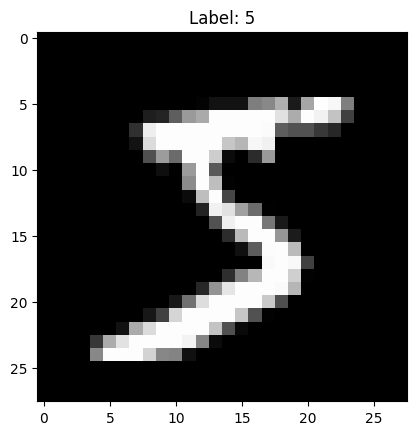

In [ ]:
# 2. Verificar formas
print("x_train shape:", x_train.shape)  # (60000, 28, 28) esta e sla normalizacion de las imagenes
print("y_train shape:", y_train.shape)  # (60000,)
print("y_train_one_hot shape:", y_train_one_hot.shape) # (60000, 10)

# 3. Mostrar una imagen
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [ ]:
# Compilar y entrenar

# Define el modelo de Keras
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplana las imágenes de 28x28 a un arreglo 1D
    Dense(128, activation='relu'), # Agrega una capa densa con activación ReLU
    Dense(10, activation='softmax') # Agrega la capa de salida con 10 unidades para los 10 dígitos y activación softmax
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Usar las etiquetas one-hot encoded para el entrenamiento
history = model.fit(x_train, y_train_one_hot, epochs=10, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8032 - loss: 8.4118 - val_accuracy: 0.8898 - val_loss: 0.5385
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8934 - loss: 0.4475 - val_accuracy: 0.9159 - val_loss: 0.3699
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9231 - loss: 0.2975 - val_accuracy: 0.9284 - val_loss: 0.3066
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9314 - loss: 0.2655 - val_accuracy: 0.9367 - val_loss: 0.2679
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9407 - loss: 0.2296 - val_accuracy: 0.9408 - val_loss: 0.2678
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9459 - loss: 0.2079 - val_accuracy: 0.9383 - val_loss: 0.2858
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9495 - loss: 0.2041 - val_accuracy: 0.9375 - val_loss: 0.2621
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9524 - loss: 0.1915 - val

In [ ]:
#Ahora probaremos la exactitud del modelo entrenado con el conjunto de datos preseparado para la prueba
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f"\n Exactitud en el conjunto de prueba REAL: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.3532

 Exactitud en el conjunto de prueba REAL: 0.9387


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


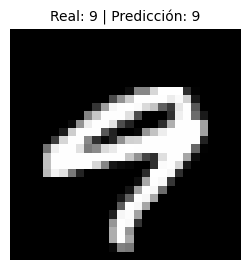

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


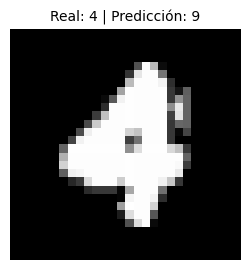

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


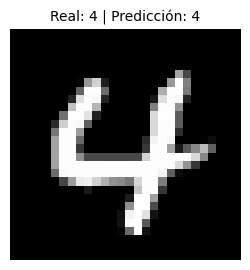

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


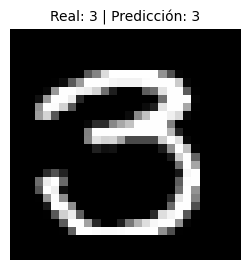

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


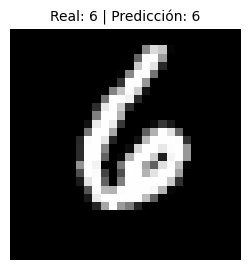

In [ ]:
num_samples_to_display = 5 # Puedes cambiar este número según cuántas imágenes quieras mostrar
random_indices = random.sample(range(len(x_test)), num_samples_to_display)

for i in random_indices:
    img = x_test[i]
    true_label = y_test[i]  # Etiqueta real (número entero)

    # Predicción (añadir dimensión batch con [np.newaxis])
    pred_prob = model.predict(img[np.newaxis, ...])  # Formato: (1, 28, 28)
    pred_label = np.argmax(pred_prob)  # Convertir one-hot a número

    # Mostrar imagen + resultados
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap='gray')
    plt.title(f"Real: {true_label} | Predicción: {pred_label}", fontsize=10)
    plt.axis('off')
    plt.show()